# Project Group - 10

Splinter Groenink: 5170672  
Ton van Mameren: 6108466  
Gijs Volkers: 5295920   
Hidde Voogt: 5886694  
Justin Wagenaar: 5088259



# Research Objective

The COVID-19 pandemic caused big changes to human's travel behaviour. Research shows that the main reasons for travel, choice of transportation mode, travel distance, and trip frequency for primary journeys differed considerably before and during the pandemic. For example there was a notable shift from public transportation toward private vehicles and non-motorized modes (Abdullah et al., 2020). There is not much research about how this behaviour changed after the pandemic. Another intersting question is about whether there also is a difference on people's travel behaviour depending on where they live. To answer these questions, this report adresses the following research question: 

What are the differences in transportation modes used in different urbanization-level areas before, during, and after the COVID-19 pandemic?

This research question is answered with the following subquestions:

- How did the amount of travel time change across periods in different urbanization levels (in hours)? This subquestion investigates how the total time people spent traveling shifted during the pandemic. Examining changes in travel time across urban, suburban, and rural areas can reveal how individuals in different settings adapted their travel habits in response to the pandemic.

- How did passenger kilometers vary across different periods in the different urbanization levels? Passenger kilometers measure the distance traveled per person across various transportation modes. By assessing this statistic across urbanization levels, shifts in overall travel distances can be understood. Changes in passenger kilometers provide insight into whether people in various regions continued commuting long distances or opted for shorter, more localized travel.

- How did the number of trips vary across different transportation modes and periods? This question examines the frequency of trips taken across different transportation modes (e.g., cars, public transit, bicycles) during the pandemic. By tracking trip frequency over time, this analysis reveals shifts in transportation preferences and the extent to which different modes were utilized or avoided. This is particularly relevant for public transportation, which was heavily impacted by health concerns and restrictions.

In the first section the datasources and the data pipeline is explained. Afterwards, each subquestion is answered and visualised. Finally the report ends with a conclusion to summarise the findings from the data.





# Contribution Statement


**Splinter Groenink**: Distance subquestion & discussion

**Ton van Mameren**: Trips subquestion

**Gijs Volkers**: Data, Data processing & map plot

**Hidde Voogt**: Travel hours subquestion & conclusion

**Justin Wagenaar**: Animated plots & introduction

In [4]:
# Import necessary packages and helper functions

from helper_functions.data_rename import make_named_clean_dataset
from helper_functions.map_maker import generate_map
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # Ensure Plotly is also imported here
# import mplcursors

from helper_functions.functions_trips import *
from helper_functions.passenger_km_time import passenger_prop_plot, passenger_km_plot

from helper_functions.barplot_animation import barplotanimation  # Import the function correctly

from helper_functions.Function_Travel_Hours import plot_travelminutes



# Data Used

All data in this project comes from the Central Bureau of Statistics (CBS). The CBS is a Dutch government organization whose main task is to make statistics on societal topics and publish them. Think of subjects like population growth, inflation, crime, imports and exports, etc. But therefore also topics such as corona, mobility and data per municipality/region. This data is collected by CBS by surveying companies, individuals, but also by analyzing registers. CBS is a reputable government organization that has reliable information because they have lots and lots of good data. Moreover, they always indicate in their data how precise the data is by always indicating the upper and lower bound of the data. Moreover, they always state how they calculated the data and what exactly the data indicates. 

#### This project used two datasets from CBS, Mobility Data (2018-2023) and Geospatial Data (Wijk- en Buurtkaart 2020).

**Mobility data (2018-2023).**

The mobility dataset provides a detailed overview of the travel behavior of Dutch citizens. Data is available on multiple modes of transportation, frequency of trips, and distances traveled, broken down by region and degree of urbanization.
The dat contains the following columns:

In [5]:
# Open and show mobility data

file_path = 'oud/84710ENG_TypedDataSet_30092024_142837.csv'

data_raw = pd.read_csv(file_path, delimiter=';', encoding='utf-8')

**Geospatial data (Wijk- en buurtkaart 2020).**

The geospatial dataset provides geographic information at the neighbourhood and district level. This map contains spatial classifications of the Netherlands, including detailed descriptions of areas such as degree of urbanisation and socioeconomic characteristics. Linking this data to the mobility data makes the data easier to understand, as the data can be linked to the different municipalities in the Netherlands.
There is a lot of data in this file, but here are the main columns, look especially Here for more information about this dataset.


In [20]:
# Open and show geospatial data

gemeenten = gpd.read_file('WijkBuurtkaart_2020_v3/gemeente_2020_v3.shp')

gemeenten.head()

DriverError: WijkBuurtkaart_2020_v3/gemeente_2020_v3.shp: No such file or directory

### Data Transformation

The CBS data was very unclearly structured, using many codes, making it difficult to decipher exactly what was in each line. Therefore, we decided to make the information in the rows readable by converting codes to readable values. We went from XXX
To XXX. To do this, function XXX was used.

What is also important to mention is that we only used the value and not the upper and lower bound. We know CBS has good data, so we chose for simplicity to use only the value. 


In [6]:
# Transform the dataset to make it readable

data = make_named_clean_dataset(data_raw)

data.head()

Named And Cleaned Data After Dropping Missing Values: (1698, 13) 



,ID,Trips_Per_Day,Distance_Travelled_PassengerKm_Per_Day,Time_Travelled_Minutes_Per_Day,Trips_Per_Year,Distance_Travelled_PassengerKm_Per_Year,Time_Travelled_Hours_Per_Year,TravelMotives,Population,TravelModes,Margins,RegionCharacteristics,Period
102,102,2.70,32.66,77.71,987.0,11922.0,472.7,Total,Population 6 years or older,Total,Value,Extremely urbanised,2018
103,103,2.59,31.41,76.64,947.0,11464.0,466.2,Total,Population 6 years or older,Total,Value,Extremely urbanised,2019
104,104,2.14,20.77,61.54,782.0,7601.0,375.4,Total,Population 6 years or older,Total,Value,Extremely urbanised,2020
105,105,2.33,23.02,71.00,852.0,8402.0,431.9,Total,Population 6 years or older,Total,Value,Extremely urbanised,2021
106,106,2.52,25.44,72.81,918.0,9287.0,442.9,Total,Population 6 years or older,Total,Value,Extremely urbanised,2022




### Information urbanization rate

To get a good idea of the different degrees of urbanization, we created a plot that looks at the degree of urbanization for each municipality. This makes the data we put down further in the report a lot easier to understand because the reader can relate it to the different municipalities in the Netherlands.

In [ ]:
generate_map('WijkBuurtkaart_2020_v3/gemeente_2020_v3.shp')

# Data Pipeline

**How did amount of travel time across periods in the different urbanisation levels (in minutes)?**

Understanding the variation travel time for passengers before, during and after the COVID-19 pandemic indicates how travel behaviour might have changed due to the pandemic. These results are cross-checked with the level of urbanisation and provides new insights. A variation of graphs are presented below. Both the graphs contain data from 2018-2023. The COVID-19 pandemic had significant effects on the travel time in 2020, as time furthers travel time augments again. The line plot displays, in line with the expectation, a sharp decline in travel time in 2020 (during the first 'hard'lock-down). It then continues to rise but not evenly across urbanisation level. The areas which were labelled as 'not urbanised' did not climb as fast as the other levels of urbanisation. This could, perhaps, be attributed to the amount of people that work 'remote' and would have to travel further than other people in different urbanisation areas. 


The heatmap underscores these trends with a visual representation of travel time variations. Brighter colors, indicating higher travel times, show a clear decline in 2020 across all regions. However, in the post-pandemic years, the colors reveal a gradual return to increased travel, with urbanized regions showing a more intense recovery. Notably, areas with lower urbanization remain shaded in darker colors, signaling that pre-COVID levels have yet to fully return.

These findings suggest that remote work and telecommuting may have a lasting impact, particularly in non-urbanized areas, where travel patterns may have fundamentally shifted due to the pandemic. This data could indicate a new equilibrium for travel demand, especially if remote work policies persist

In [8]:
# make plot for travelhours

# Deze naam moet anders, want dit werkt niet met hours nad minutes samen.

# Dit is voor justing zn grafieken:
datanototal = data[data['TravelModes'] != 'Total']  # Exclude 'Total'

plot_travelminutes()
barplotanimation(datanototal, 'Time_Travelled_Hours_Per_Year', 'Time travelled (hours/year)')

# Analysis of Passenger Kilometers Across Different Urban Areas (2018–2023)

Passenger kilometers, representing the total distance travelled by passengers is a good metric for understanding overall travel behavior and mobility trends. Passenger kilometers changes give valuable insights into the pandemic's impact on people's mobility patterns. Different urbanization levels in this case: very urban, urban, semi-urban, and rural areas, may show different patterns due to variations in population density. The availability of transport modes and local restrictions could also impact the difference in travelled kilometers.

## Passenger Kilometers Over Time

The line chart reveals a sharp decline in passenger kilometers for all areas in 2020, aligning with the start of the pandemic. Highly urbanized areas experienced one of the most significant drops. This decrease reflects strict lockdowns, the rise of remote work, and health concerns that kept people at home.

By 2021, travel began to pick up again, but the recovery rates differed:

- In less urbanized areas with hardly and non-urbanized areas saw a quicker return to near-normal travel levels by 2022. This faster rebound might be due to greater reliance on personal vehicles, fewer restrictions, and lower population densities.

- In highly urbanized areas the recovery was slower, with 2023 levels still slightly below those of 2018. Ongoing remote work and lasting changes in lifestyle likely contributed to this slower return to pre-pandemic travel habits.


In [ ]:
passenger_km_plot(data)

In [9]:
barplotanimation(datanototal, 'Distance_Travelled_PassengerKm_Per_Year', 'Distance travelled (km/year)')

## Proportional Contribution to Total Travel Dit moet ff anders.
The area chart shows each urbanization level's share of total passenger kilometers over time. Despite the overall drop in travel during 2020, highly and moderately urbanized areas consistently made up the largest portions.

## After 2020 Shift

After 2020, there was a slight shift. The increase for the less urbanized areas gained a small but noticeable increase in their share of total travel.
Overall, while there were changes, the proportions remained relatively stable, indicating that urbanized areas continue to play a key role in overall mobility.

## Conclusion

The pandemic caused a significant drop in passenger kilometers across all areas in 2020. The less urbanized areas came back more quickly, possibly due to personal vehicle use and fewer restrictions. The higher urbanized areas recovered more  slowly. These findings suggest that while there were temporary changes in travel patterns, there may also be lasting effects on how people in highly urbanized areas choose to travel in the future.


Subquestion 2: How did the number of trips vary across different transportation modes and periods?

In this part of the report, we will look at how the number of trips vary across different transportation modes and periods. Firstly, we will look at the global trend without specify for the transportation modes. This trend can be seen in the figure below. 

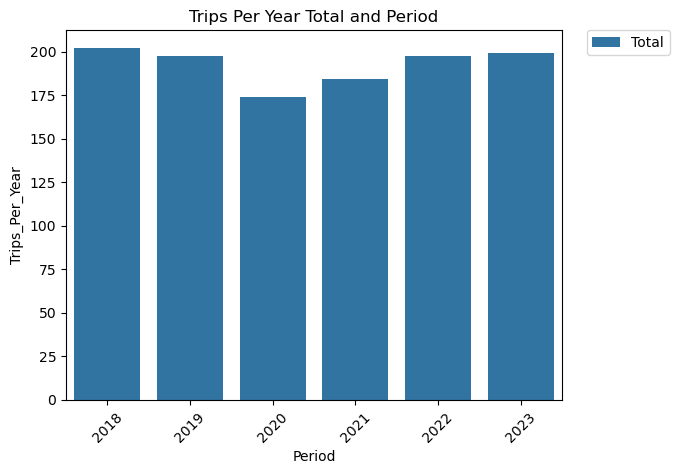

In [10]:
trips_per_year_total_and_period(data)

In the figure above, for each period (pre, during and after COVID-19) the total trips per year for all transportation modes are plotted. We can see a decrease in the number of trips per year in the year 2020, in that year COVID-19 started. Furthermore, we can see the effect from the measurments taken to reduce the virus, which resulted in fewer trips. In 2021, it was still COVID-19 time, however less was closed then during 2020. In 2022 and 2023, the number of trips per year went (almost) back to the pre COVID-19 level. 

In the next figures, the number of trips will be specified for the different transportation modes. 

In [12]:
barplotanimation(datanototal, 'Trips_Per_Year', 'Trips per year')

In the figure above, the number of trips taking each year have been specified. Just as the figure for all transportation modes together, the decrease in trips for the transportation modes can be seen. However, if we look specific for the mode walking something different can be seen. The number of trips for walking increased during COVID-19. Since many sport activities could not continue during COVID-19 and people had to stay at home, people started looking for other simple activiteit that were allowed to do during COVID_19. Walking alone or with a friend at 1.5m distance was one of the activities that many people started doing and can be seen in the figure above. The number of trips from the other transportation modes decreased during COVID-19. 

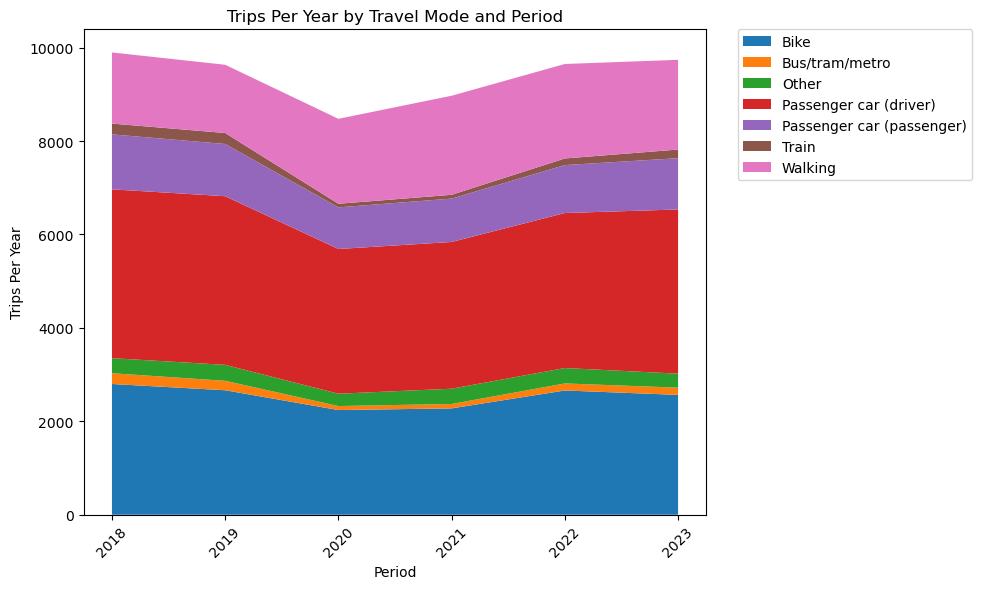

In [ ]:
area_chart_trips(data)

In the visualization above, the first two figures are combined. The total number of trips for each year can still be seen, which is the sum of all transportation modes. Within the total, the different transportation modes are defined with colours. The bigger the area of a colour, the higher the number of trips for that specific transportation mode in that year. 

## Conclusion

All in all, this report has sought to research the influence of COVID-19 on the travel behaviour of the citizens of the Netherlands. The report examined shifts in travel behavior across different urbanization levels in the Netherlands before, during, and after the COVID-19 pandemic, with a focus on travel time, passenger kilometers, and trip frequency across transportation modes. This research identified four sub-questions to answer the followinng research question: What are the differences in transportation modes used in different urbanization-level areas before, during, and after the COVID-19 pandemic? 

This report found that the post-COVID level of transport hours, trips, kilometers have not been restored to the pre-COVID level. This report also identified that there were, however, regional differences for these variables. This report found that the non-urbanised regions are recovering slower (to pre-covid numbers) in terms of travel hours, but this region is recovering more quickly in terms of passenger kilometers and number of trips. 
It therefore seems that people living in non-urbanised areas are still travelling frequently but in less time. For the other urbanisation levels there is not necessarily a difference in terms of the key variables. For these regions, they variables increase and decrease relatively the same. 
Also, the study found that non-motorized modes, such as walking, gained popularity during the pandemic, reflecting a shift in lifestyle and a preference for local, socially distanced activities. Although some travel behaviors have returned to pre-pandemic levels, the persistence of remote work and a cautious approach toward public transit in urban areas suggest that certain changes may be long-lasting. 


## Discussion and limitations: 
For most of the research, only one dataset was used. The dataset was based on a CBS dataset that gave an overview of the travel behaviour of Dutch citizens. The data set provided insight into the travel behaviour of Dutch citizens but lacked specific data for real research into travel patterns. The CBS dataset is based on aggregated survey data, which may overlook individual variations in travel patterns. External factors such as seasonal effects, fuel prices, or temporary disruptions in public transportation are not controlled for. These kinds of external factors can have an impact on travel behaviour. The study does not consider variations in employment types or flexibility in remote work across regions, which likely influenced recovery rates but were not explicitly accounted for. These limitations suggest that while the study provides valuable insights into pandemic-related changes in travel behaviour, a more comprehensive dataset and additional controls are necessary for a full understanding of the underlying factors influencing these shifts.
Future research 
Future research could improve on this study by using individual-level data to capture how personal factors like age and job type influence travel behaviour. Examining seasonal changes, fuel prices, and transport disruptions would provide a fuller view of external impacts. 
A study with the long-term effects of remote work on commuting, especially in urban areas, and exploring the adoption of new travel modes like e-scooters and ride-sharing across regions would give more insights into post-pandemic travel patterns. A study with data from another country could also reveal h